In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ---------- ---------------------------- 81.9/314.6 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Prepa

In [2]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/20/50/638cbeb5b202b39d0605f6170fe25ed75287152827b0282d64135995b32b/Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 495.5 kB/s eta 0:00:02
   --------- ------------------------------ 143.4/614.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


XGBOOST

In [7]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.5/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.0/99.8 MB 5.5 MB/s eta 0:00:18
   ---------------------------------------- 1.2/99.8 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.5/99.8 MB 5.5 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 6.6 MB/s eta 0:00:15
   - -------------------------------------- 2.9/99.8 MB 7.7 MB/s eta 0:00:13
   - --------------------------------

In [23]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import yfinance as yf

#import pandas_datareader as pdr
#from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [22]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e9/db/f1641a99e1f95489baec8472d2c88c8f6b87f7be242a846864bd1a19c0f4/optuna-3.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/379.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/379.9 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 276.5/37

In [9]:
stock = yf.download('AMZN') # stockticker

[*********************100%%**********************]  1 of 1 completed


In [10]:
num_days_pred = 30 # Number of days to predict in the future is inversely proportional to accuracy

In [13]:
# We will use the last 2 years of stock data 
slice = int(len(stock)- 356*2)
stock = stock.iloc[slice:]

In [15]:
# We will use only Close value column
stock.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'],inplace=True)


In [17]:
# Function to calculate mean absolute error percentage
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def add_lags(df,num_days_pred=num_days_pred):
    target = 'Close'
    df['lag1'] = df[target].shift(num_days_pred)  
    df['lag2'] = df[target].shift(num_days_pred*2)    
    df['lag3'] = df[target].shift(num_days_pred*3)    
    df['lag4'] = df[target].shift(num_days_pred*4)    
    df['lag5'] = df[target].shift(num_days_pred*5)
    df['lag6'] = df[target].shift(num_days_pred*6)
    df['lag7'] = df[target].shift(num_days_pred*7)
    df['lag8'] = df[target].shift(num_days_pred*8)
    df['lag9'] = df[target].shift(num_days_pred*9)
    df['lag10'] = df[target].shift(num_days_pred*10)
    df['lag11'] = df[target].shift(num_days_pred*11)
    df['lag12'] = df[target].shift(num_days_pred*12)



    return df

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [19]:
df_xgb = stock.copy()

In [20]:
def xgboostmodel(df_xgb,add_lags,create_features,num_days_pred=num_days_pred):

    df_xgb = create_features(df_xgb)
    df_xgb = add_lags(df_xgb)
    
    X = df_xgb.drop(columns='Close')
    y = df_xgb['Close']
    return X,y
X,y = xgboostmodel(df_xgb ,add_lags,create_features,num_days_pred=30)

In [24]:
# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to search
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'verbosity': 0,
        #'tree_method': 'gpu_hist',
    }
    
    # Initialize XGBoost regressor with the suggested parameters
    xgb = XGBRegressor(**param)
    
    # Fit the model on training data
    xgb.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = xgb.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print the best trial and parameters found
print("Best trial:")
best_trial = study.best_trial
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Use the best parameters to train the final model
best_params = best_trial.params
xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)

[I 2024-03-30 23:30:15,048] A new study created in memory with name: no-name-c0fef3d5-e3fe-419a-9363-a61fd0237361
[I 2024-03-30 23:30:17,345] Trial 0 finished with value: 4.7932142742375 and parameters: {'n_estimators': 640, 'max_depth': 9, 'learning_rate': 0.09260709938382561, 'subsample': 0.7375018441228487, 'colsample_bytree': 0.9475505384413682, 'reg_alpha': 5.308510683229782, 'reg_lambda': 4.634731268017626}. Best is trial 0 with value: 4.7932142742375.
[I 2024-03-30 23:30:18,001] Trial 1 finished with value: 4.588786396376272 and parameters: {'n_estimators': 499, 'max_depth': 3, 'learning_rate': 0.07330618887456991, 'subsample': 0.8093952741680029, 'colsample_bytree': 0.8640930596150003, 'reg_alpha': 5.08820156072969, 'reg_lambda': 8.402029740406721}. Best is trial 1 with value: 4.588786396376272.
[I 2024-03-30 23:30:18,444] Trial 2 finished with value: 4.964758343840834 and parameters: {'n_estimators': 106, 'max_depth': 8, 'learning_rate': 0.0459606063582142, 'subsample': 0.6721

[I 2024-03-30 23:30:56,808] Trial 23 finished with value: 4.335174627976394 and parameters: {'n_estimators': 726, 'max_depth': 5, 'learning_rate': 0.03594304480650051, 'subsample': 0.6459339851520357, 'colsample_bytree': 0.8371642420047618, 'reg_alpha': 1.3381597878714375, 'reg_lambda': 6.672410545697233}. Best is trial 20 with value: 4.221198875977742.
[I 2024-03-30 23:30:59,618] Trial 24 finished with value: 4.208630949821794 and parameters: {'n_estimators': 987, 'max_depth': 6, 'learning_rate': 0.018388738956083155, 'subsample': 0.7700732459686831, 'colsample_bytree': 0.6995174276082093, 'reg_alpha': 3.3124718876430954, 'reg_lambda': 5.175879104617448}. Best is trial 24 with value: 4.208630949821794.
[I 2024-03-30 23:31:02,442] Trial 25 finished with value: 4.3027809698931545 and parameters: {'n_estimators': 990, 'max_depth': 6, 'learning_rate': 0.01134860148751112, 'subsample': 0.8698554593932258, 'colsample_bytree': 0.6927395371990923, 'reg_alpha': 2.7958380216711136, 'reg_lambda'

[I 2024-03-30 23:31:54,439] Trial 47 finished with value: 4.390925526242887 and parameters: {'n_estimators': 534, 'max_depth': 4, 'learning_rate': 0.09978827749924826, 'subsample': 0.7492885092510562, 'colsample_bytree': 0.6377092938471118, 'reg_alpha': 1.5937942930915594, 'reg_lambda': 1.9468684086923087}. Best is trial 42 with value: 4.111038373878226.
[I 2024-03-30 23:31:56,451] Trial 48 finished with value: 4.286536514352095 and parameters: {'n_estimators': 824, 'max_depth': 5, 'learning_rate': 0.042379530690379114, 'subsample': 0.7986191877273588, 'colsample_bytree': 0.7269149900489161, 'reg_alpha': 2.777545229498683, 'reg_lambda': 4.018437914390904}. Best is trial 42 with value: 4.111038373878226.
[I 2024-03-30 23:31:57,663] Trial 49 finished with value: 4.546607000399575 and parameters: {'n_estimators': 942, 'max_depth': 3, 'learning_rate': 0.051409304230442876, 'subsample': 0.7188323623558888, 'colsample_bytree': 0.6233244610474354, 'reg_alpha': 0.06464815971834947, 'reg_lambda

Best trial:
  Value: 4.111038373878226
  Params: 
    n_estimators: 919
    max_depth: 5
    learning_rate: 0.04085248468079289
    subsample: 0.7957591662347395
    colsample_bytree: 0.6676743241246611
    reg_alpha: 0.7137759615676439
    reg_lambda: 3.714045422150588
Test RMSE: 4.111038373878226


In [25]:
# Evaluation


y_pred_test_xgb = xgb_best.predict(X_test)
xgb_loss = mean_absolute_percentage_error(y_test, y_pred_test_xgb) 
print(f"ERROR PERCENT = { mean_absolute_percentage_error(y_test, y_pred_test_xgb) }% ")

ERROR PERCENT = 2.240883231204455% 


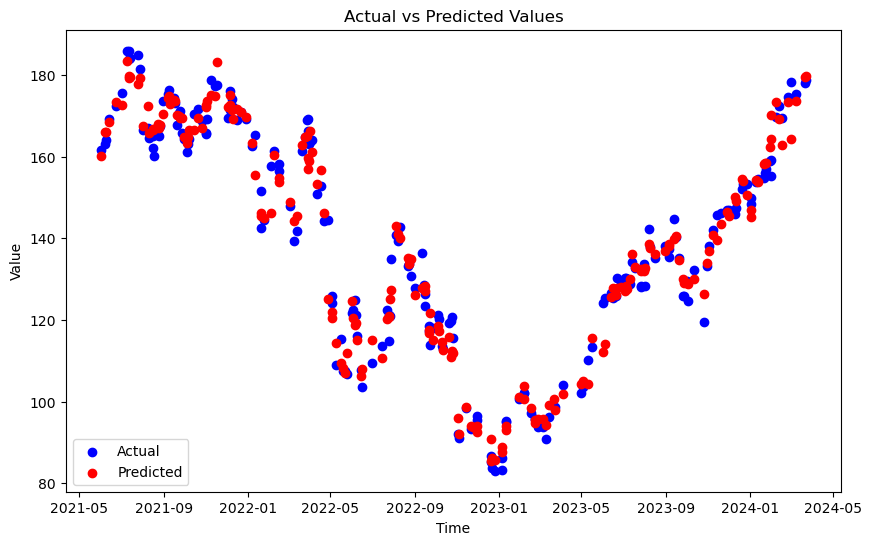

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_pred_test_xgb , color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

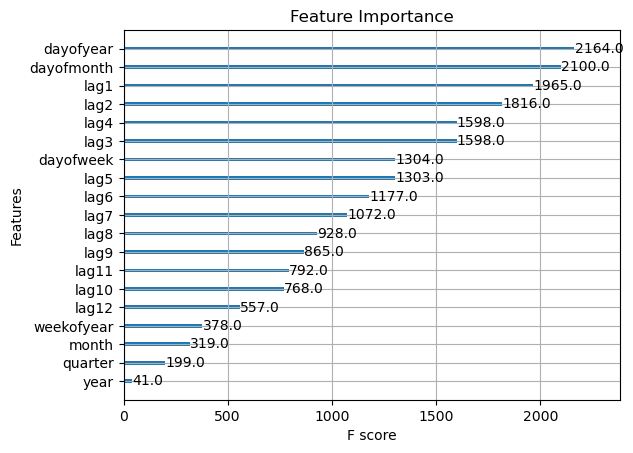

In [27]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_best, max_num_features=20)  # Adjust max_num_features as needed
plt.title("Feature Importance")
plt.show()

In [28]:
#Predict future


start = df_xgb.index.max()
end = start + pd.Timedelta(days=num_days_pred)

In [29]:
future = pd.date_range(start=start,end=end,freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture']= True
df_xgb['isFuture']= False
df_and_future = pd.concat([df_xgb,future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)
future_w_features = df_and_future.query('isFuture').copy()

In [30]:
future_w_features['pred'] = xgb_best.predict(future_w_features.drop(columns=['Close','isFuture']))

In [31]:
prediction_xgb = pd.DataFrame(future_w_features['pred'])
prediction_xgb

,pred
2024-03-27,178.893738
2024-03-28,178.811935
2024-03-29,177.722076
2024-03-30,158.779205
2024-03-31,172.058472
2024-04-01,150.322784
2024-04-02,146.181259
2024-04-03,174.372757
2024-04-04,153.119324
2024-04-05,145.645447


ARIMA

In [32]:
df_arima = stock.copy()

In [34]:
# 80-20 split

split_date = df_arima.index[int(len(df_arima) * 0.8)]
train_arima = df_arima.loc[df_arima.index <= split_date].copy()
test_arima = df_arima.loc[df_arima.index > split_date].copy()

In [35]:
# Try to find the best parameters for arima model 
stepwise_fit = auto_arima(train_arima['Close'],trace=True,suppress_warnings=True)
# assign the parameter to "best_order" variable
best_order = stepwise_fit.get_params()['order']

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2960.076, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2955.716, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2957.716, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2957.716, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2953.805, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2959.716, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.156 seconds


In [36]:
arima = ARIMA(train_arima['Close'], order=best_order)
arima = arima.fit()

In [37]:
start = len(train_arima)
end = len(test_arima) + len(train_arima)

In [38]:
pred_arima = arima.predict(start=start,end=end-1)

In [39]:
pred_arima.index = test_arima.index

<Axes: xlabel='Date'>

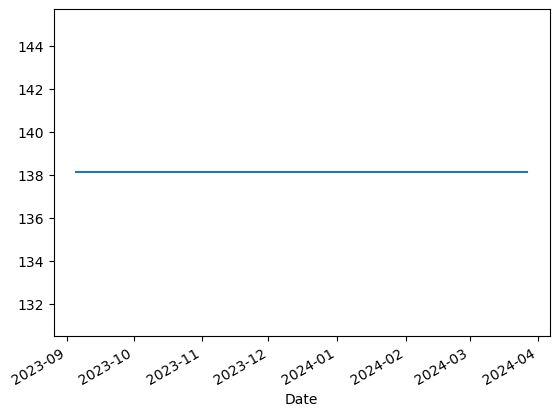

In [40]:
pred_arima.plot()

In [41]:
arima_loss = mean_absolute_percentage_error(test_arima['Close'],pred_arima )
print(f"ERROR PERCENT = { mean_absolute_percentage_error(test_arima['Close'],pred_arima ) }% ")

ERROR PERCENT = 10.512121791887873% 


In [42]:
# best parameters for arima model 
stepwise_fit = auto_arima(df_arima['Close'],trace=True,suppress_warnings=True)
# assign the parameter to "best_order" variable
best_order = stepwise_fit.get_params()['order']

arima = ARIMA(df_arima['Close'], order=best_order)
arima = arima.fit()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3642.955, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3644.954, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3644.954, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3641.005, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3646.954, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.486 seconds


In [43]:
start = len(df_arima)
end = len(df_arima) + num_days_pred
arima_forecast = arima.predict(start=start,end=end)

In [44]:
start = df_arima.index.max()
end = start + pd.Timedelta(days=num_days_pred)
arima_forecast.index = pd.date_range(start, end, freq='1d')

In [45]:
arima_forecast = pd.DataFrame(arima_forecast)

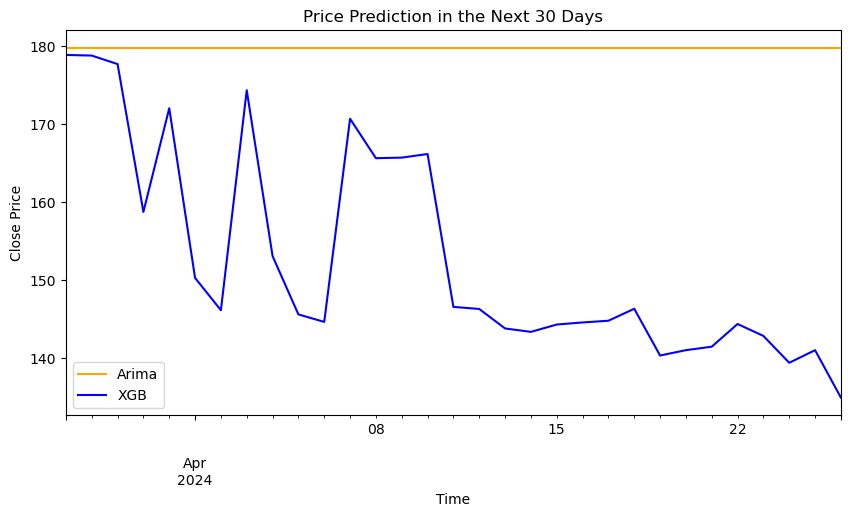

In [46]:
fig, ax  = plt.subplots(figsize=(10,5))
arima_forecast.plot(color='orange',ax=ax)
prediction_xgb.plot(color = 'blue',ax=ax)
plt.legend(['Arima','XGB'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f"Price Prediction in the Next {num_days_pred} Days");

In [47]:
print(f"XGB Acc : {100-xgb_loss} \nArima Acc : {100-arima_loss}")

XGB Acc : 97.75911676879555 
Arima Acc : 89.48787820811212
